In [2]:
#Preprocessing and Visualization #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder


#Feature selection & Model selection#
from sklearn.feature_selection import SelectFromModel,RFE,SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import lightgbm as lgb
import csv

#Metrics
from sklearn.metrics import cohen_kappa_score,f1_score,accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,ConfusionMatrixDisplay

#To handle warnings
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning, module='sklearn')

In [3]:


# To load dataset from Kaggle. Click on Add Data->Search for Arrhythmia-ECG  Dataset from UCI->
#Copy the CSV file path under Input 

data = pd.read_csv("/kaggle/input/arrhythmia-ecg-dataset-from-uci/arrhythmia.csv")

# to load dataset from Google Collab
#filepath='/content/sample_data/arrhythmia.csv'
#data=pd.read_csv(filepath)


In [4]:
data.shape

(452, 280)

In [4]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [5]:
##Missing Value Imputation Method 2
##KNN imputer
KNNimputer=KNNImputer(n_neighbors=5)
KNNimputeddata=KNNimputer.fit_transform(data)

KNNimputedDF=pd.DataFrame(KNNimputeddata)

# Imputation outcome
KNNimputedDF.isnull().sum().sort_values(ascending=False)

KNNimputedDF.columns=data.columns
#print(KNNimputedDF)

In [6]:
#train test split with complete featureset 
x = KNNimputedDF.drop("class", axis=1)
y = KNNimputedDF["class"]
print(x.shape)


(452, 279)


In [7]:
# Normalization
x_scaled = StandardScaler().fit_transform(x)

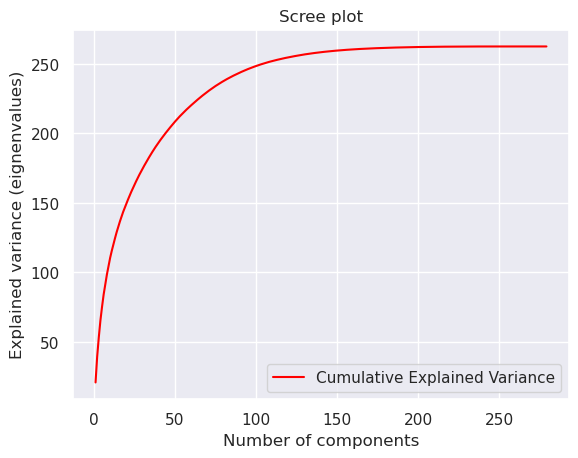

In [8]:

sns.set()

pca1 = PCA(n_components=279)

# Fit and transform data
x_pca = pca1.fit_transform(x_scaled)

plt.plot(
    range(1,len(pca1.explained_variance_ )+1),
    np.cumsum(pca1.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='lower right')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')

plt.show()

In [9]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=2, stratify=y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.1,random_state=2, stratify=y)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

# create PCA featureset
pca = PCA(n_components = 150)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train1 = pca.fit_transform(x_train1)
x_test1 = pca.transform(x_test1)

print(x_train.shape)
print(x_test.shape)

(361, 150)
(91, 150)


In [40]:


from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'gamma': [0.1, 0.01, 0.001, 0.0009, 0.0005, 0.0001]}
svm = SVC()

svm_gs = GridSearchCV(svm, parameters)
svm_gs.fit(X_train, y_train)
GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=10)

print("best hyperparameters: ", svm_gs.best_params_)
print("accuracy with the best parameters: ", svm_gs.best_score_)


best hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy with the best parameters:  0.5014079147640791


In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)

knn_gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')

knn_gs.fit(X_train, y_train)

print("best hyperparameters: ", knn_gs.best_params_)
print("accuracy with the best parameters: ", knn_gs.best_score_)

best hyperparameters:  {'n_neighbors': 13}
accuracy with the best parameters:  0.5041291291291291


In [42]:

rfc=RandomForestClassifier()
#parameters = {'n_estimators': [10, 20, 30, 40], 'max_features': ['sqrt', 'log2'], 'max_depth' : [6, 7, 8, 9], 'criterion' :['gini', 'entropy', 'log_loss'], 'min_samples_leaf':[1, 2, 3]} # daje 0.59 accuracy s najboljim parametrima
parameters={'max_depth':[100, 150, 200, 250], 'n_estimators':[10, 20, 30, 40, 50], 'min_samples_leaf':[1, 2, 3, 4]}
rfc_gs = GridSearchCV(estimator=rfc, param_grid=parameters, cv=10)
rfc_gs.fit(X_train, y_train)

print("best hyperparameters: ", rfc_gs.best_params_)
print("accuracy with the best parameters: ", rfc_gs.best_score_)

best hyperparameters:  {'max_depth': 100, 'min_samples_leaf': 4, 'n_estimators': 50}
accuracy with the best parameters:  0.5042042042042042


In [ ]:
#RandomizedSearchCV hyperparameter turning for MLP#
model=MLPClassifier()
parameters = {
    
'activation':['identity', 'logistic', 'tanh', 'relu'],
'solver':['lbfgs', 'sgd', 'adam'],
'learning_rate':['constant', 'invscaling', 'adaptive'],
'max_iter':[100,200]
       
    }

classifier=RandomizedSearchCV(model,parameters,cv=5)
classifier.fit(x_train,y_train)
classifier.cv_results_
results2=pd.DataFrame(classifier.cv_results_)
#print(results2)
best_param2 = classifier.best_params_
print(best_param2)
high_accuracy2=classifier.best_score_
print(high_accuracy2)

Accuacy of SVM: 75.82417582417582
Accuacy of MLP: 71.42857142857143
Accuacy of KNN: 56.043956043956044
Accuacy of RFC: 63.73626373626373
Accuacy of NB: 57.14285714285714
Accuacy of lgbm: 75.82417582417582


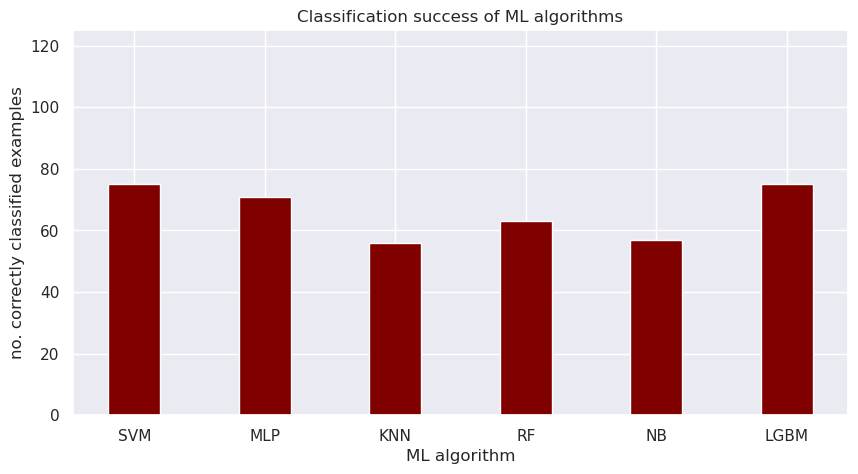

Kappa score of SVM: 0.5920945395273023
Kappa score of MLP: 0.5774245400964457
Kappa score KNN: 0.18477043673012317
Kappa score RFC: 0.30901978831109056
Kappa score NB: 0.3169745958429562
Kappa score lgbm: 0.6026989482040086


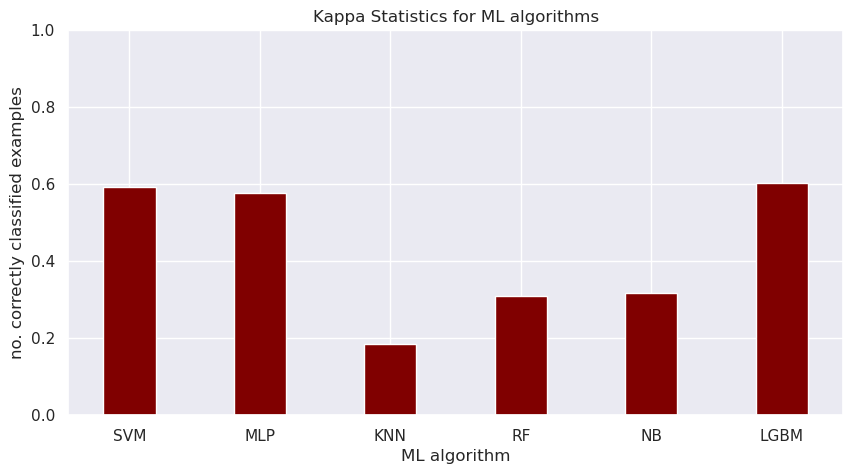

SVM_report 
               precision    recall  f1-score   support

         1.0       0.75      1.00      0.86        49
         2.0       0.67      0.44      0.53         9
         3.0       1.00      1.00      1.00         3
         4.0       1.00      0.67      0.80         3
         5.0       1.00      0.33      0.50         3
         6.0       1.00      0.00      0.00         5
         7.0       1.00      0.00      0.00         1
         9.0       1.00      0.00      0.00         2
        10.0       0.82      0.90      0.86        10
        14.0       1.00      1.00      1.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         4

    accuracy                           0.76        91
   macro avg       0.77      0.45      0.46        91
weighted avg       0.76      0.76      0.70        91

KNN_report 
               precision    recall  f1-score   support

         1.0       0.58      0.90      0.70        4

In [11]:
# classification models for train test split as 80:20

svm_t = SVC(C = 16, kernel = 'rbf', gamma = 0.0005,random_state=42).fit(x_train, y_train)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(200), activation='tanh', 
                               alpha=0.001, solver='lbfgs', batch_size=64, learning_rate='adaptive',learning_rate_init=0.001, random_state=42)
mlp_classifier.fit(x_train, y_train)

knn_t = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

rfc_t = RandomForestClassifier(criterion= 'gini', n_estimators=100, random_state=42,max_depth = 250, min_samples_leaf = 1).fit(x_train, y_train)

lgbm_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42).fit(x_train,y_train)

nb_model = GaussianNB().fit(x_train,y_train)


svm_pred = svm_t.predict(x_test)
knn_pred = knn_t.predict(x_test)
MLP_pred = mlp_classifier.predict(x_test)
rfc_pred = rfc_t.predict(x_test)
nb_pred=nb_model.predict(x_test)
lgbm_pred=lgbm_classifier.predict(x_test)

svm_acc = accuracy_score(y_test, svm_pred)*100
knn_acc = accuracy_score(y_test, knn_pred)*100
MLP_acc=accuracy_score(y_test, MLP_pred)*100
rfc_acc = accuracy_score(y_test, rfc_pred)*100
nb_acc = accuracy_score(y_test,nb_pred)*100
lgbm_acc=accuracy_score(y_test,lgbm_pred)*100

print ("Accuacy of SVM:",svm_acc)
print("Accuacy of MLP:", MLP_acc)
print ("Accuacy of KNN:", knn_acc)
print ("Accuacy of RFC:",rfc_acc)
print("Accuacy of NB:",nb_acc)
print("Accuacy of lgbm:",lgbm_acc)

bar_data = dict()
bar_data['SVM'] = int(svm_acc)
bar_data['MLP'] = int(MLP_acc)
bar_data['KNN'] = int(knn_acc)
bar_data['RF'] = int(rfc_acc)
bar_data['NB'] = int(nb_acc)
bar_data['LGBM'] = int(lgbm_acc)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Classification success of ML algorithms")
plt.show()


# Kappa Statistics
svm_Kappa = cohen_kappa_score(y_test, svm_pred)
knn_kappa = cohen_kappa_score(y_test, knn_pred)
MLP_kappa=cohen_kappa_score(y_test, MLP_pred)
rfc_kappa = cohen_kappa_score(y_test, rfc_pred)
nb_kappa = cohen_kappa_score(y_test,nb_pred)
lgbm_kappa=cohen_kappa_score(y_test,lgbm_pred)

print ("Kappa score of SVM:",svm_Kappa)
print("Kappa score of MLP:", MLP_kappa)
print ("Kappa score KNN:", knn_kappa)
print ("Kappa score RFC:",rfc_kappa)
print("Kappa score NB:",nb_kappa)
print("Kappa score lgbm:",lgbm_kappa)

bar_data = dict()
bar_data['SVM'] = float(svm_Kappa)
bar_data['MLP'] = float(MLP_kappa)
bar_data['KNN'] = float(knn_kappa)
bar_data['RF'] = float(rfc_kappa)
bar_data['NB'] = float(nb_kappa)
bar_data['LGBM'] = float(lgbm_kappa)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=1)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Kappa Statistics for ML algorithms")
plt.show()

# classification report
SVM_report= classification_report (y_test, svm_pred,zero_division=1)
knn_report = classification_report(y_test, knn_pred,zero_division=1)
MLP_report=classification_report(y_test, MLP_pred,zero_division=1)
rfc_report = classification_report(y_test, rfc_pred,zero_division=1)
nb_report= classification_report(y_test,nb_pred,zero_division=1)
lgbm_report=classification_report(y_test,lgbm_pred,zero_division=1)

print("SVM_report \n",SVM_report)

print("KNN_report \n",knn_report)

print("MLP_report \n",MLP_report)

print("RFC_report \n",rfc_report)

print("NB_report \n",nb_report)

print("lgbm_report \n",lgbm_report)




Accuacy of SVM: 73.91304347826086
Accuacy of MLP: 69.56521739130434
Accuacy of KNN: 54.347826086956516
Accuacy of RFC: 60.86956521739131
Accuacy of NB: 47.82608695652174
Accuacy of Lightgbm: 65.21739130434783


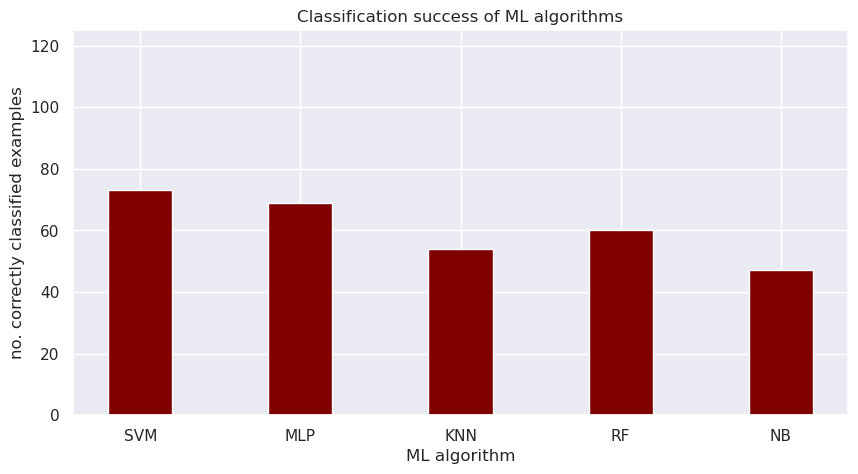

In [12]:
# 90: 10 split

svm_t = SVC(C = 13, kernel = 'rbf', gamma = 0.0005,random_state=42).fit(x_train1, y_train1)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(200), activation='tanh', 
                               alpha=0.001, solver='lbfgs', batch_size=64, learning_rate='adaptive',learning_rate_init=0.001, random_state=42)
mlp_classifier.fit(x_train1, y_train1)

knn_t = KNeighborsClassifier(n_neighbors=3).fit(x_train1, y_train1)
rfc_t = RandomForestClassifier(criterion= 'gini', n_estimators=100, random_state=42,max_depth = 250, min_samples_leaf = 1).fit(x_train1, y_train1)
lgbm_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42).fit(x_train1,y_train1)
nb_model = GaussianNB().fit(x_train1,y_train1)

svm_pred = svm_t.predict(x_test1)
knn_pred = knn_t.predict(x_test1)
MLP_pred = mlp_classifier.predict(x_test1)
rfc_pred = rfc_t.predict(x_test1)
nb_pred=nb_model.predict(x_test1)
lgbmpredict=lgbm_classifier.predict(x_test1)

svm_acc = accuracy_score(y_test1, svm_pred)*100
knn_acc = accuracy_score(y_test1, knn_pred)*100
MLP_acc=accuracy_score(y_test1, MLP_pred)*100
rfc_acc = accuracy_score(y_test1, rfc_pred)*100
nb_acc = accuracy_score(y_test1,nb_pred)*100
lgbm_acc=accuracy_score(y_test1,lgbmpredict)*100


print ("Accuacy of SVM:",svm_acc)
print("Accuacy of MLP:", MLP_acc)
print ("Accuacy of KNN:", knn_acc)
print ("Accuacy of RFC:",rfc_acc)
print("Accuacy of NB:",nb_acc)
print("Accuacy of Lightgbm:",lgbm_acc)

bar_data = dict()
bar_data['SVM'] = int(svm_acc)
bar_data['MLP'] = int(MLP_acc)
bar_data['KNN'] = int(knn_acc)
bar_data['RF'] = int(rfc_acc)
bar_data['NB'] = int(nb_acc)
#bar_data['NB'] = int(lgbm_acc)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Classification success of ML algorithms")
plt.show()



Kappa score of SVM: 0.547911547911548
Kappa score of MLP: 0.5743555849306013
Kappa score KNN: 0.18549747048903886
Kappa score RFC: 0.2106768350810294
Kappa score NB: 0.19650655021834063
Kappa score lgbm: 0.3799494524010111


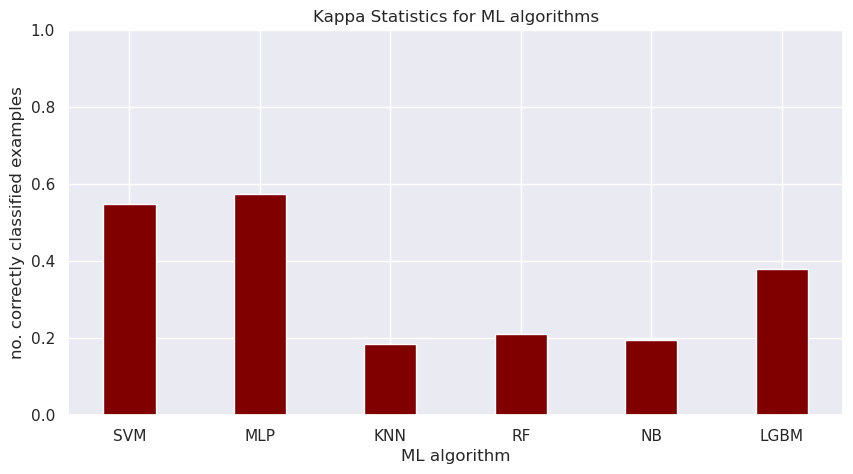

In [17]:

# Kappa Statistics
svm_Kappa = cohen_kappa_score(y_test1,svm_pred)
knn_kappa = cohen_kappa_score(y_test1, knn_pred)
MLP_kappa=cohen_kappa_score(y_test1, MLP_pred)
rfc_kappa = cohen_kappa_score(y_test1, rfc_pred)
nb_kappa = cohen_kappa_score(y_test1,nb_pred)
lgbm_kappa=cohen_kappa_score(y_test1,lgbmpredict)

print ("Kappa score of SVM:",svm_Kappa)
print("Kappa score of MLP:", MLP_kappa)
print ("Kappa score KNN:", knn_kappa)
print ("Kappa score RFC:",rfc_kappa)
print("Kappa score NB:",nb_kappa)
print("Kappa score lgbm:",lgbm_kappa)

bar_data = dict()
bar_data['SVM'] = float(svm_Kappa)
bar_data['MLP'] = float(MLP_kappa)
bar_data['KNN'] = float(knn_kappa)
bar_data['RF'] = float(rfc_kappa)
bar_data['NB'] = float(nb_kappa)
bar_data['LGBM'] = float(lgbm_kappa)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=1)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Kappa Statistics for ML algorithms")
plt.show()



In [13]:
# classification report
SVM_report= classification_report (y_test1, svm_pred,zero_division=1)
knn_report = classification_report(y_test1, knn_pred,zero_division=1)
MLP_report=classification_report(y_test1, MLP_pred,zero_division=1)
rfc_report = classification_report(y_test1, rfc_pred,zero_division=1)
nb_report= classification_report(y_test1,nb_pred,zero_division=1)
lgbm_report=classification_report(y_test1,lgbmpredict,zero_division=1)

print("SVM_report \n",SVM_report)

print("KNN_report \n",knn_report)

print("MLP_report \n",MLP_report)

print("RFC_report \n",rfc_report)

print("NB_report \n",nb_report)

print("lgbm_report \n",lgbm_report)


SVM_report 
               precision    recall  f1-score   support

         1.0       0.74      1.00      0.85        25
         2.0       0.67      0.50      0.57         4
         3.0       1.00      1.00      1.00         2
         4.0       1.00      0.50      0.67         2
         5.0       1.00      0.00      0.00         1
         6.0       1.00      0.00      0.00         3
         9.0       1.00      0.00      0.00         1
        10.0       0.80      0.80      0.80         5
        15.0       1.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         2

    accuracy                           0.74        46
   macro avg       0.82      0.38      0.39        46
weighted avg       0.76      0.74      0.67        46

KNN_report 
               precision    recall  f1-score   support

         1.0       0.58      0.84      0.69        25
         2.0       0.50      0.25      0.33         4
         3.0       1.00      1.00      1.00         

In [14]:
pca1 = PCA(n_components = 150)
pca_features=pca1.fit_transform(x_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/

Cross validation score of SVM: 0.6991666666666668
Cross validation score of MLP: 0.6681944444444448
Cross validation score of KNN: 0.6018055555555557
Cross validation score of RFC: 0.606388888888889
Cross validation score of NB: 0.40083333333333343
Cross validation score of lgbm: 0.675277777777778


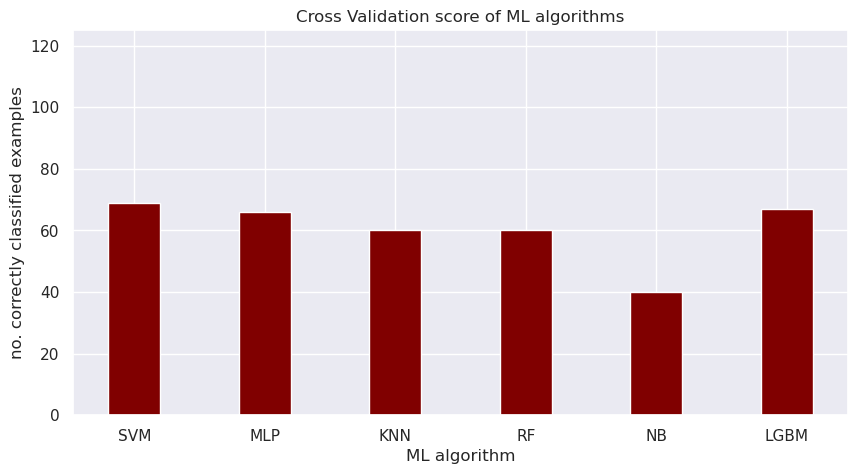

In [16]:
# cross val score of classification models

lgbm_score=cross_val_score(lgbm_classifier,pca_features,y,cv=30,scoring='accuracy').mean()
svm_score=cross_val_score(svm_t,pca_features,y,cv=30,scoring='accuracy').mean()
mlp_score=cross_val_score(mlp_classifier,pca_features,y,cv=30,scoring='accuracy').mean()
knn_score=cross_val_score(knn_t,pca_features,y,cv=30,scoring='accuracy').mean()
rfc_score=cross_val_score(rfc_t,pca_features,y,cv=30,scoring='accuracy').mean()
nb_score=cross_val_score(nb_model,pca_features,y,cv=30,scoring='accuracy').mean()


print ("Cross validation score of SVM:",svm_score)
print("Cross validation score of MLP:", mlp_score)
print ("Cross validation score of KNN:", knn_score)
print ("Cross validation score of RFC:",rfc_score)
print("Cross validation score of NB:",nb_score)
print("Cross validation score of lgbm:",lgbm_score)

bar_data = dict()
bar_data['SVM'] = int(svm_score * 100)
bar_data['MLP'] = int(mlp_score *100)
bar_data['KNN'] = int(knn_score * 100)
bar_data['RF'] = int(rfc_score * 100)
bar_data['NB'] = int(nb_score *100)
bar_data['LGBM'] = int(lgbm_score *100)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Cross Validation score of ML algorithms")
plt.show()

In [11]:
#Stratified k-fold#
#Normalize the features selected from Original Dataset#
scaler= StandardScaler()
pca_features=scaler.fit_transform(pca_features)

# Labelling#
X = pca_features  # Features
y = y    # Target labels

# Number of desired folds (k)
n_splits = 30

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate through the splits
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Replace the following with your model training and evaluation code
    # For example, you can train your model on X_train and y_train and evaluate it on X_test and y_test
    model= lgbm_classifier.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    
    # Print or store the evaluation results
    print("Model Score",accuracy.mean())


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(


Model Score 0.75
Model Score 0.6875
Model Score 0.6
Model Score 0.6666666666666666
Model Score 0.6666666666666666
Model Score 0.7333333333333333
Model Score 0.5333333333333333
Model Score 0.7333333333333333
Model Score 0.5333333333333333
Model Score 0.7333333333333333
Model Score 0.7333333333333333
Model Score 0.6
Model Score 0.7333333333333333
Model Score 0.6
Model Score 0.6666666666666666
Model Score 0.7333333333333333
Model Score 0.6666666666666666
Model Score 0.6666666666666666
Model Score 0.8
Model Score 0.6666666666666666
Model Score 0.6
Model Score 0.6666666666666666
Model Score 0.6
Model Score 0.6
Model Score 0.6666666666666666
Model Score 0.6666666666666666
Model Score 0.8
Model Score 0.6666666666666666
Model Score 0.6666666666666666
Model Score 0.7333333333333333


In [13]:
print('Model Score for LightGBM',accuracy.mean())

Model Score for LightGBM 0.7333333333333333
